<a href="https://colab.research.google.com/github/Sotrosca/perceptron_template/blob/master/perceptron_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Redes Neuronales, DC, UBA - Primer Cuatrimestre 2019
# Codigo template simplificado de perceptron simple escalon que resuelve el AND logico.
# MUY IMPORTANTE: Modificar el codigo para incorporarle las mejoras especificadas en los comentarios del codigo.

import numpy as np
import matplotlib.pyplot as plt

In [0]:
def shuffleArrays(array_1, array_2):
  if (array_1.shape[0] != array_2.shape[0]):
    raise Exception("Array dimension must be the same")
  
  shape = array_1.shape[0]
  array_1_aux = np.zeros(array_1.shape)
  array_2_aux = np.zeros(array_2.shape)
  randomList = np.arange(shape)
  np.random.shuffle(randomList)
  
  j = 0
  for i in randomList:
    array_1_aux[j] = array_1[i]
    array_2_aux[j] = array_2[i]
    j = j + 1
  
  
  return (array_1_aux, array_2_aux)

In [0]:
class FuncionesDeActivacion():
  
  def logistica(self, x):
    
    denominador = 1 + np.exp(-x)
    return 1 / denominador
  
  def logisticaDerivada(self, x):
    
    logistica = self.logistica(x)
    return logistica * (1 - logistica)
  
  def tanHiperbolica(self, x):
    return np.tanh(x)
  
  def tanHiperbolicaDerivada(self, x):
    tanh = np.tanh(x)
    return (1 + tanh) * (1 - tanh)
  
  def escalon(self, x):
    return np.where(x >= 0.0, 1, 0)
  
  def escalonDerivada(self, x):
    return 1
  
  

In [0]:
class PerceptronSimple(object):

    # Constructor de la clase. 
    def __init__(self, DimTrain, DimOut):
        # Crea el vector de pesos w de la red neuronal y lo inicializa en cero. 
        # El vector w debe tener la dimension de los patrones de entrada, incrementado en 1 debido al bias.
        # El codigo del template es para un perceptron con una sola unidad de salida. 
        # MEJORAS SOLICITADAS: MEJORA 1) Modificarlo para que el perceptron pueda emitir un vector de salidas de dimension m > 1. LISTO !!!
        # MEJORA 2) Modificarlo para que en lugar de inicializar los pesos w en cero, los inicialice en valores chicos random alrededor del cero. LISTO !!!
        self.w_ = (np.random.rand(1 + DimTrain, DimOut) - 0.5)/2 #Cada columna i representa los pesos asociados a la neurona de salida i.
       

    # "Eta" es el factor de aprendizaje, y "epochs" el numero maximo de epocas de entrenamiento.
    # Los valores de eta y epochs en la primera linea, son los valores por defecto, si no se especifican dichos parametros en la funcion de llamada.
    def train(self, X, y, eta=0.01, epochs=100, withValidation=False, X_validation=[], y_validation =[], umbral_validation=0, funcionDeActivacion=2):
        self.eta = eta
        self.epochs = epochs
       
        # Guarda el historial de los errores de clasificacion del conjunto de entremamiento en este vector. 
        # MEJORAS SOLICITADAS: Agregar que tambien se guarde el historial de los errores del conjunto de validacion. LISTO !!!
        self.errors_ = []
        self.errorsValidation_ = []
        # Entrena la red por la cantidad maxima de epocas especificada. 
        # MEJORAS SOLICITADAS: Modificarlo para que pare el entrenamiento cuando la funcion de costo (E[w] de la clase teorica) del conjunto de validacion
        # sea menor a cierto umbral, y no deba necesariamente entrenar la cantidad maxima de epocas. LISTO !!!
        
        funcion = FuncionesDeActivacion()
        
        for _ in range(self.epochs):
            #print("época: " + str(_))
            errors = 0
            errorsValidation = 0
            # Pasa por la red todos los patrones del conjunto de entrenamiento (o sea, el perceptron entrena 1 epoca). Notar que en este codigo pasa 
            # los patrones de entrenamiento siempre en el mismo orden. 
            # MEJORAS SOLICITADAS: Modificarlo para que el orden de los patrones de entrenamiento sea random en cada epoca 
            # (estrategia simple que mejora la velocidad de aprendizaje de la red). LISTO !!
            
            X, y = shuffleArrays(X, y) # Reordena al azar los elementos de X e y conjuntamente.
            
            for xi, target in zip(X, y):
                # Actualiza los pesos de la red mediante la Regla Delta. 
                # Notar que el factor de aprendizaje eta, es cuanto influye el error actual de la red en la modificacion de los pesos.
                # MEJORAS SOLICITADAS: Modificar la regla Delta del template para que la actualizacion de los pesos sea valida para funciones de 
                # activacion continuas no lineales. LISTO !!
                
                if (funcionDeActivacion == 0):
                    update = self.eta * (target - self.predict(xi, funcion=funcionDeActivacion)) * funcion.logisticaDerivada(self.net_input(xi))
                    errors +=  ((np.sum(target - self.predict(xi, funcion=funcionDeActivacion))) ** 2) / 2
                elif (funcionDeActivacion == 1):
                    update = self.eta * (target - self.predict(xi, funcion=funcionDeActivacion)) * funcion.tanHiperbolicaDerivada(self.net_input(xi))
                    errors +=  ((np.sum(target - self.predict(xi, funcion=funcionDeActivacion))) ** 2) / 2              
                else:
                    update = self.eta * (target - self.predict(xi, funcion=funcionDeActivacion)) * funcion.escalonDerivada(self.net_input(xi))
                    errors += int(not(np.array_equal(update, np.zeros(DimOut))))
                
                update_ = np.expand_dims(update, axis=0)
                xi_ = np.expand_dims(xi, axis=1)
                self.w_[1:, :] +=  xi_ @ update_
                # La dimension del patron de entrada se incrementa en 1 en forma ficticia por el bias, y el primer elemento del vector 
                # de entrada es constante=1.
                # Por eso aca, cuando hace la actualizacion del w_[0] (que representa el valor del bias), multiplica update por 1.
                self.w_[0, :] +=  update * 1
                # MEJORAS SOLICITADAS: Modificar para que calcule y guarde la funcion de costo E[w] de los conjuntos de entrenamiento y de validacion,
                # en lugar de la cantidad de patrones que clasifico mal en esa epoca. LISTO !!
                
                
            self.errors_.append(errors)
            
            if(withValidation):
               for xi_validation, target_validation in zip(X_validation, y_validation):
                  comparacion = target_validation - self.predict(xi_validation, funcionDeActivacion)
                  
                  #Detalle de los errores de validacion.
                  #print("xi_validation: " + str(xi_validation))
                  #print("target_validation: " + str(target_validation))
                  #print("prediccion: " + str(self.predict(xi_validation, funcionDeActivacion)))
                  #print("comparacion: " + str(comparacion))                  
                  #print("valor de error: " + str(int(not(np.array_equal(comparacion, np.zeros(DimOut))))))
                  #print("----")
                  if(funcionDeActivacion == 0 or funcionDeActivacion == 1):
                    errorsValidation += ((np.sum(comparacion))** 2) / 2
                  else:
                    errorsValidation += int(not(np.array_equal(comparacion, np.zeros(DimOut))))
                  
               self.errorsValidation_.append(errorsValidation)
              
               if (errorsValidation < umbral_validation):
                  
                  return self      
          
        return self

    # Empieza a calcular la salida del perceptron simple.
    def net_input(self, X):
        #return np.dot(X, self.w_[1:]) + self.w_[0]
        return self.w_[0,:] + X @ self.w_[1:, :] # devuelve un vector de dimension DimOut.
      

    # Aplica la funcion de activacion (en el caso del template, la funcion escalon unipolar) 
    # MEJORAS SOLICITADAS: Mejora1) Modificar para que implemente otras funciones de activacion, no solo la escalon. LISTO !!
    # Mejora2) Implementar funciones de activacion bipolares. LISTO !!
    def predict(self, X, funcion=2):
        
        funciones = FuncionesDeActivacion() 
        sumaNeuronas = self.net_input(X)
        
        if (funcion == 0):
          return funciones.logistica(sumaNeuronas)
        elif (funcion == 1):
          return funciones.tanHiperbolica(sumaNeuronas)
        else:
          return funciones.escalon(sumaNeuronas)

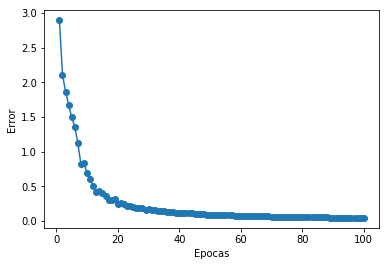

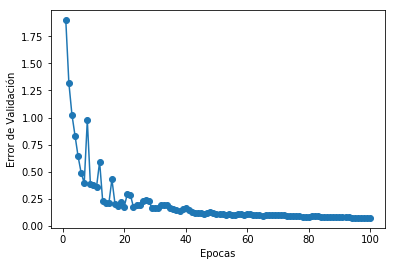

error por época: [2.893371461803392, 2.1054064937970116, 1.8627558626282676, 1.673253434061464, 1.4921962342371553, 1.3563784253088682, 1.1166470125103185, 0.8183845137752452, 0.8363414969074305, 0.6834644884499566, 0.6028818067816022, 0.4977029784000343, 0.417229740822809, 0.4347345277379729, 0.4052268801352349, 0.3595845997936684, 0.2963918655885778, 0.3028958376084824, 0.3099749387300015, 0.2489721242830413, 0.25531578496712304, 0.2406960634397856, 0.21042750307549313, 0.21976072300999921, 0.2052332995447524, 0.1913559975146848, 0.1859694978657691, 0.1792771174818445, 0.16255702561518293, 0.16538284250891616, 0.1581235331195204, 0.15015315671177903, 0.1459610662607205, 0.14184637033425887, 0.1375722174882375, 0.13187366797588268, 0.12781240739501498, 0.1240476732423739, 0.11949705525850288, 0.11645244520237472, 0.11401880568348838, 0.10745997825843384, 0.1060114754293522, 0.10636058498769713, 0.10062200224479981, 0.09913669686816882, 0.0988554761050357, 0.0949211801009995, 0.0908887

In [16]:
# Dataset de entrenamiento para el AND logico. 
# MEJORAS SOLICITADAS: Mejora1) Modificarlo para probar con otros datasets de otros problemas. LISTO !!
# Mejora2) Crear tambien conjuntos de valicacion y de testing. LISTO !!

X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = np.array([[-1], [-1], [-1], [1]])
X_validation = np.array([[0.3, 0.2], [0.3, 0.1], [0.4, 0.1], [0.3, 0.3], [0.1, 1.1], [0.9, 0.1], [1.2, 1.3]])
y_validation = np.array([[-1], [-1], [-1], [-1], [-1], [-1], [1]])
X_test = []
y_test = []

# Dimension de los patrones de entremiento. Por ejemplo, para el AND logico, la dimension de los patrones de entremiento es 2.
DimTrain = X.shape[1]

DimOut = y.shape[1]

# Se crea el objeto perceptron. 
ppn = PerceptronSimple(DimTrain, DimOut)

# Se entrena el perceptron. 
ppn.train(X, y, epochs=100, eta=0.3, withValidation=True, X_validation=X_validation, y_validation=y_validation, umbral_validation= 0., funcionDeActivacion=1)

# Se grafica la cantidad de clasificaciones incorrectas en cada epoca versus numero de epoca. 
# Ademas se grafica la lista de errores y de errores de validación en cada época.
# Luego se grafica los resultados que arroja la red para los valores de entrenamiento y de validación.
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.show()
plt.plot(range(1, len(ppn.errorsValidation_)+1), ppn.errorsValidation_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Error de Validación')
plt.show()

infoDetallada = True

if (infoDetallada):
  x = 1
  print("error por época: " + str(ppn.errors_))
  print("error de validación por época: " + str(ppn.errorsValidation_))
  print("----")
  print("Conjunto de validación")
  print("predict([0.1, 0.1])= " + str(ppn.predict([0.1, 0.1], funcion=x)))
  print("predict([0.1, 1.1])= " + str(ppn.predict([0.1, 1.1], funcion=x)))
  print("predict([0.9, 0.1])= " + str(ppn.predict([0.9, 0.1], funcion=x)))
  print("predict([1.2, 1.3])= " + str(ppn.predict([1.2, 1.3], funcion=x)))
  print("----")
  print("Conjunto de entrenamiento")
  print("predict([0., 0.])= " + str(ppn.predict([0., 0.], funcion=x)))
  print("predict([0., 1.])= " + str(ppn.predict([0., 1.], funcion=x)))
  print("predict([1., 0.])= " + str(ppn.predict([1., 0.], funcion=x)))
  print("predict([1., 1.])= " + str(ppn.predict([1., 1.], funcion=x)))

  




# MEJORAS SOLICITADAS: Agregar imprimir la funcion de costo y el root-mean-square error final del conjunto de testing, 
# para saber la performance final de la red neuronal.